# Proprocesammiento

En esta notebook se hace lo siguiente:  
1.- se calcula la Mean de los features que tiene valores nulos para luego ser imputados.  
2.- Se elimina las variables categoricas.  
3.- se cacula en Z-score para eliminar los Outliers.  
4.- Se caclula en valor VIF para ser usado para eliminas las variables multicolineares.  
5.- Se determinan y corrigen los feautures Skewed.  
6.- Se estandarizan las columnas usando un StandardScaler.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df_full = pd.read_csv('../../data/raw/train_dataset.csv')

In [4]:
# Se obtienen los valores de la Mean antes de imputar para poder imputar la misma media en ambos set de datos
a = df_full['year_built'].mean()
b = df_full['energy_star_rating'].mean()
c = df_full['direction_max_wind_speed'].mean()
d = df_full['direction_peak_wind_speed'].mean()
e = df_full['max_wind_speed'].mean()
f = df_full['days_with_fog'].mean()

In [5]:
df_full['year_built'].fillna(a, inplace=True)
df_full['energy_star_rating'].fillna(b, inplace=True)
df_full['direction_max_wind_speed'].fillna(c, inplace=True)
df_full['direction_peak_wind_speed'].fillna(d, inplace=True)
df_full['max_wind_speed'].fillna(e, inplace=True)
df_full['days_with_fog'].fillna(f, inplace=True)

In [6]:
df_full['State_Factor'].value_counts()

State_6     50840
State_11     6412
State_1      5618
State_2      4871
State_4      4300
State_8      3701
State_10       15
Name: State_Factor, dtype: int64

In [7]:
df_full['building_class'].value_counts()

Residential    43558
Commercial     32199
Name: building_class, dtype: int64

In [8]:
df_full.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,3.899395,4


In [9]:
df_full = df_full.drop(columns=['facility_type', 'id'])

In [10]:
df_full.head()

,Year_Factor,State_Factor,building_class,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
0,1,State_1,Commercial,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,248.682615
1,1,State_1,Commercial,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,26.500150
2,1,State_1,Commercial,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,24.693619
3,1,State_1,Commercial,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,48.406926
4,1,State_1,Commercial,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,3.899395


In [11]:
df_full.shape

(75757, 62)

In [12]:
ohc = OneHotEncoder()
ohs1 = ohc.fit_transform(df_full.building_class.values.reshape(-1,1)).toarray()
dfs1 = pd.DataFrame(ohs1, columns = ["Temp_building_class_"+str(ohc.categories_[0][i])
                               for i in range(len(ohc.categories_[0]))])
df_full = pd.concat([df_full, dfs1], axis = 1)  
df_full.head()

,Year_Factor,State_Factor,building_class,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,Temp_building_class_Commercial,Temp_building_class_Residential
0,1,State_1,Commercial,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,248.682615,1.0,0.0
1,1,State_1,Commercial,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,26.500150,1.0,0.0
2,1,State_1,Commercial,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,24.693619,1.0,0.0
3,1,State_1,Commercial,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,48.406926,1.0,0.0
4,1,State_1,Commercial,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,3.899395,1.0,0.0


In [13]:
df_full.shape

(75757, 64)

In [14]:
df_full = df_full.drop(columns=['building_class'], axis = 1)
df_full.head()

,Year_Factor,State_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,Temp_building_class_Commercial,Temp_building_class_Residential
0,1,State_1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,248.682615,1.0,0.0
1,1,State_1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,26.500150,1.0,0.0
2,1,State_1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,24.693619,1.0,0.0
3,1,State_1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,48.406926,1.0,0.0
4,1,State_1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,3.899395,1.0,0.0


In [15]:
df_full.shape

(75757, 63)

In [16]:
df_full['TEMP_State_Factor']=LabelEncoder().fit_transform(df_full.State_Factor)

In [17]:
df_full.head()

,Year_Factor,State_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,Temp_building_class_Commercial,Temp_building_class_Residential,TEMP_State_Factor
0,1,State_1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,248.682615,1.0,0.0,0
1,1,State_1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,26.500150,1.0,0.0,0
2,1,State_1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,24.693619,1.0,0.0,0
3,1,State_1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,48.406926,1.0,0.0,0
4,1,State_1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,3.899395,1.0,0.0,0


In [18]:
df_full = df_full.drop(columns=['State_Factor'], axis = 1)
df_full.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,Temp_building_class_Commercial,Temp_building_class_Residential,TEMP_State_Factor
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,248.682615,1.0,0.0,0
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,26.500150,1.0,0.0,0
2,1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,24.693619,1.0,0.0,0
3,1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,48.406926,1.0,0.0,0
4,1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,3.899395,1.0,0.0,0


In [19]:
aux_site_eui= pd.DataFrame(df_full['site_eui'])
aux_site_eui.head()

,site_eui
0,248.682615
1,26.500150
2,24.693619
3,48.406926
4,3.899395


In [20]:
df_full = df_full.drop(columns=['site_eui'], axis = 1)
df_full.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,Temp_building_class_Commercial,Temp_building_class_Residential,TEMP_State_Factor
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,1.0,0.0,0
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,1.0,0.0,0
2,1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,1.0,0.0,0
3,1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,1.0,0.0,0
4,1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,1.0,0.0,0


In [21]:
df_full.shape

(75757, 62)

In [22]:
df_full = pd.concat([df_full, aux_site_eui], axis = 1)  
df_full.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,Temp_building_class_Commercial,Temp_building_class_Residential,TEMP_State_Factor,site_eui
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,1.0,0.0,0,248.682615
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,1.0,0.0,0,26.500150
2,1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,1.0,0.0,0,24.693619
3,1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,1.0,0.0,0,48.406926
4,1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,1.0,0.0,0,3.899395


In [23]:
df_full.shape

(75757, 63)

Se calcula el Z-score para eliminar los outliers

In [24]:
from scipy import stats
import numpy as np

In [25]:
z = np.abs(stats.zscore(df_full))

In [26]:
df_full.shape

(75757, 63)

In [27]:
df_full.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,Temp_building_class_Commercial,Temp_building_class_Residential,TEMP_State_Factor,site_eui
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,1.0,0.0,0,248.682615
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,1.0,0.0,0,26.500150
2,1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,1.0,0.0,0,24.693619
3,1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,62.779974,1.0,12.000000,1.0,0.0,0,48.406926
4,1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.000000,1.0,109.142051,1.0,0.0,0,3.899395


Se elimina aquellas fillas que no cumplan con el treshold

In [28]:
df_full_z_scores = df_full[(z < 3).all(axis=1)]

In [29]:
df_full_z_scores.shape

(55844, 63)

In [30]:
df_full_z_scores.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,Temp_building_class_Commercial,Temp_building_class_Residential,TEMP_State_Factor,site_eui
1005,2,5112.0,1952.306764,61.048605,116.7,29,51.870968,72,37,53.696429,77,39,54.306452,73,39,59.116667,86,46,62.032258,87,50,65.150000,94,55,66.548387,86,56,66.870968,85,51,64.65,86,48,64.516129,95,39,57.566667,83,33,50.725806,69,321,2135,13.10,0.0,0,59.783562,1,0,0,0,29,3,0,0,66.552675,62.779974,4.190601,109.142051,1.0,0.0,0,88.204070
1047,3,39817.0,1952.306764,61.048605,209.1,21,42.596774,63,26,43.750000,63,32,53.500000,78,33,54.900000,81,41,59.822581,87,50,70.866667,99,59,75.645161,93,55,73.370968,93,41,68.40,92,34,56.725806,78,33,51.233333,73,27,46.564516,68,986,3378,16.07,16.0,18,58.197260,16,0,0,0,87,18,0,0,66.552675,62.779974,4.190601,109.142051,1.0,0.0,0,23.918058
1048,3,153088.0,1952.306764,61.048605,209.1,21,42.596774,63,26,43.750000,63,32,53.500000,78,33,54.900000,81,41,59.822581,87,50,70.866667,99,59,75.645161,93,55,73.370968,93,41,68.40,92,34,56.725806,78,33,51.233333,73,27,46.564516,68,986,3378,16.07,16.0,18,58.197260,16,0,0,0,87,18,0,0,66.552675,62.779974,4.190601,109.142051,1.0,0.0,0,46.341562
1050,3,5478.0,1952.306764,61.048605,73.8,21,42.596774,63,26,43.750000,63,32,53.500000,78,33,54.900000,81,41,59.822581,87,50,70.866667,99,59,75.645161,93,55,73.370968,93,41,68.40,92,34,56.725806,78,33,51.233333,73,27,46.564516,68,986,3378,16.07,16.0,18,58.197260,16,0,0,0,87,18,0,0,66.552675,62.779974,4.190601,109.142051,1.0,0.0,0,127.576434
1051,3,49399.0,1952.306764,61.048605,73.8,21,42.596774,63,26,43.750000,63,32,53.500000,78,33,54.900000,81,41,59.822581,87,50,70.866667,99,59,75.645161,93,55,73.370968,93,41,68.40,92,34,56.725806,78,33,51.233333,73,27,46.564516,68,986,3378,16.07,16.0,18,58.197260,16,0,0,0,87,18,0,0,66.552675,62.779974,4.190601,109.142051,1.0,0.0,0,46.110646


Probamos haciendo una standarizacion normal comun y corriente ya que en teoria se eliminaron los outlier

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
transformer = StandardScaler().fit(df_full_z_scores)
df_full_scaled = transformer.transform(df_full_z_scores)

In [35]:
#se debe transforma a un dataframe ya que el metodo transorm lo retorna en un ndarray
df_full_scaled_df = pd.DataFrame(df_full_scaled, columns=df_full.columns)
df_full_scaled_df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,Temp_building_class_Commercial,Temp_building_class_Residential,TEMP_State_Factor,site_eui
count,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,55844.000000,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,55844.000000,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,55844.000000,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,55844.0,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04,5.584400e+04
mean,1.791498e-16,1.140044e-16,-1.978791e-15,5.496642e-16,-7.328856e-17,-1.954362e-16,-1.954362e-16,-1.954362e-16,0.000000,-5.211631e-16,1.628635e-17,-2.442952e-16,5.211631e-16,-6.351675e-16,3.420133e-16,1.098514e-14,-8.041383e-16,9.446081e-16,-3.582996e-16,-1.824071e-15,-7.165992e-16,-4.885904e-16,2.919328e-15,-4.234450e-16,-5.211631e-15,5.374494e-16,-6.188811e-16,-1.726353e-15,-1.140044e-16,3.257269e-16,1.986934e-15,0.000000,-1.017897e-15,-3.648141e-15,-1.009753e-15,6.514538e-17,4.096016e-15,1.433198e-15,2.157941e-16,1.815928e-15,-2.280088e-16,3.257269e-16,8.794627e-16,-1.107472e-15,-3.257269e-17,4.885904e-17,-2.719820e-15,0.000000,1.302908e-16,-1.465771e-16,9.771808e-17,2.280088e-16,1.140044e-16,-2.544742e-18,0.0,-4.071586e-17,-1.913646e-16,5.781653e-16,4.641609e-16,-1.465771e-16,-1.628635e-17,-9.771808e-17,2.117225e-16
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,0.0,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-2.349004e+00,-1.038146e+00,-3.488578e+00,-2.649028e+00,-1.015803e+00,-1.886128e+00,-1.806745e+00,-3.544582e+00,-1.153458,-1.824425e+00,-2.462684e+00,-2.142736e+00,-1.542049e+00,-1.632820e+00,-2.909286e+00,-3.076629e+00,-1.646766e+00,-3.424915e+00,-1.800202e+00,-2.866373e+00,-2.813900e+00,-3.498214e+00,-1.150229e+00,-2.590796e+00,-3.593248e+00,-2.975395e+00,-2.589246e+00,-2.850652e+00,-2.587186e+00,-2.976656e+00,-2.575725e+00,-2.784622,-4.012145e+00,-2.582973e+00,-2.604605e+00,-2.213731e+00,-2.

In [36]:
df_full_scaled_df.shape

(55844, 63)

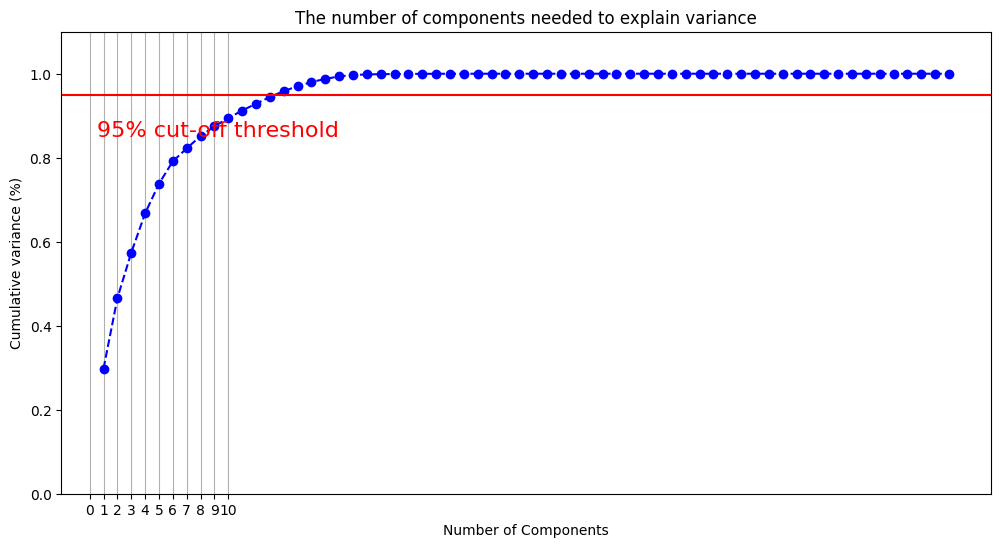

In [39]:
# Usaremps PCA
aux = df_full_scaled_df.drop(columns=['site_eui'])
pca = PCA().fit(aux)
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()

xi = np.arange(1, 63, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
plt.show()

In [41]:
df_full_scaled_df.to_csv('../../data/preprocesada/Full_Data_sin_MultiC_sin_Skew.csv')